#### NAME: DORIS LARTEBEA AMEYAW

#### PROJECT TOPIC : Emotions people express in social media posts about online shopping using CHATGPT-3 generated text.

### INTRODUCTION

##### In recent years, online shopping has become increasingly popular, with more and more people using it as a convenient and efficient way to purchase goods and services. Social media platforms such as Twitter, Instagram, and Facebook have also become popular mediums for people to express their opinions and share their experiences about online shopping. This proposal aims to investigate the emotions people express in social media posts about online shopping and to provide a detailed analysis of these emotions.

### METHODOLOGY

#### 1. Data Collection: Collect dataset of social media posts related to online shopping using Chatgpt

#### 2. Preprocessing: Removing irrelevant or duplicate data, such as retweets, spam, or non-English language posts and tokenization, Lemmatization and stop-word removal to prepare the text for analysis. Tokenization involves breaking down the text into individual words or phrases.

#### 3. Sentiment analysis: Conduct sentiment analysis on the preprocessed dataset using natural language processing (NLP) techniques to identify the emotional polarity of each post. Sentiment analysis involves classifying the polarity of the text as positive, negative, or neutral.

#### 4. Emotion detection: Emotion detection involves classifying the emotional content of the text into categories such as   etc. and use a natural language processing tool to analyze the emotional content of each post.

###  5. Visualization: Finally, we can visualize the results using graphs or charts to make the findings more accessible and understandable.


In [ ]:
### Import packages
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install openpyxl

In [ ]:
import pandas as pd
df=pd.read_excel("data/online shopping data.xlsx")


In [ ]:
df.head()

,Posts,Emotions
0,I just received my online order and it's perf...,satisfied
1,I'm so frustrated that my online order is taki...,frustrated
2,I just scored an amazing deal on my favorite ...,excited
3,I'm so disappointed that the size of my onlin...,disappointed
4,I love the convenience of online shopping! I ...,convenience


### EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Emotions'>

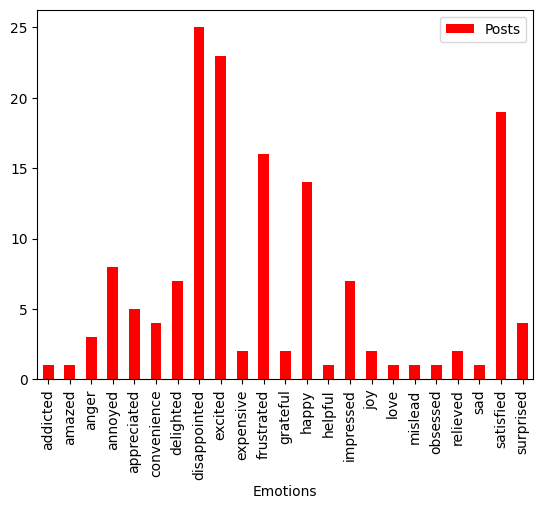

In [ ]:
df.groupby('Emotions').count().plot.bar(color='red')

##### This chart visualize the distribution of emotions on each Posts in the dataset.

<Axes: xlabel='Posts', ylabel='Density'>

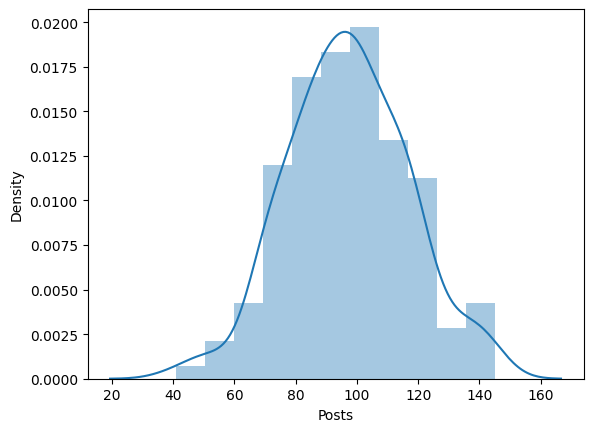

In [ ]:
## plotting the distibution of number of characters in the Posts
sns.distplot(df.Posts.str.len())

### TEXT PREPROCESSING

In [ ]:
df=df.loc[df.Posts.str.isnumeric()==False]

##### lower Casing

In [ ]:
# Convert the titles to lowercase
df['review_processed'] = df['Posts'].map(lambda x: x.lower())
df[['Posts','review_processed']].head()


,Posts,review_processed
0,I just received my online order and it's perf...,i just received my online order and it's perf...
1,I'm so frustrated that my online order is taki...,i'm so frustrated that my online order is taki...
2,I just scored an amazing deal on my favorite ...,i just scored an amazing deal on my favorite ...
3,I'm so disappointed that the size of my onlin...,i'm so disappointed that the size of my onlin...
4,I love the convenience of online shopping! I ...,i love the convenience of online shopping! i ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DEVICES\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
#Word tokenization
df.loc[:,'review_processed_1'] =df['review_processed'].apply(lambda x : word_tokenize(x))
df[['review_processed','review_processed_1']].head()

,review_processed,review_processed_1
0,i just received my online order and it's perf...,"[i, just, received, my, online, order, and, it..."
1,i'm so frustrated that my online order is taki...,"[i, 'm, so, frustrated, that, my, online, orde..."
2,i just scored an amazing deal on my favorite ...,"[i, just, scored, an, amazing, deal, on, my, f..."
3,i'm so disappointed that the size of my onlin...,"[i, 'm, so, disappointed, that, the, size, of,..."
4,i love the convenience of online shopping! i ...,"[i, love, the, convenience, of, online, shoppi..."


### Punctuation Removal

In [ ]:
import string
#Function for punctuation removal
def remove_punct(tok):
    y = [x for x in tok if x not in string.punctuation]
    return y

#Removing punctuation
df.loc[:,'review_processed_2'] =df['review_processed_1'].apply(remove_punct)

df[['review_processed_1','review_processed_2']].head()


,review_processed_1,review_processed_2
0,"[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it..."
1,"[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde..."
2,"[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f..."
3,"[i, 'm, so, disappointed, that, the, size, of,...","[i, 'm, so, disappointed, that, the, size, of,..."
4,"[i, love, the, convenience, of, online, shoppi...","[i, love, the, convenience, of, online, shoppi..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEVICES\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(tok):
    newtoken =[lemmatizer.lemmatize(i) for i in tok]
    return newtoken

df.loc[:,'review_processed_3'] =df['review_processed_2'].apply(lemma)

df[['review_processed_2','review_processed_3']].head()

,review_processed_2,review_processed_3
0,"[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it..."
1,"[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde..."
2,"[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f..."
3,"[i, 'm, so, disappointed, that, the, size, of,...","[i, 'm, so, disappointed, that, the, size, of,..."
4,"[i, love, the, convenience, of, online, shoppi...","[i, love, the, convenience, of, online, shoppi..."


### Stop Words Removal

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEVICES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Function for stop words removal
def rem_stop_words(tok):
    clean=tok[:]
    
    for word in clean:
           if word in stop_words:
                clean.remove(word)
    return clean

#Stop words removal
df.loc[:,'review_processed_4'] =df['review_processed_3'].apply(rem_stop_words)

df[['review_processed_3','review_processed_4']].head()

,review_processed_3,review_processed_4
0,"[i, just, received, my, online, order, and, it...","[just, received, online, order, it, 's, perfect]"
1,"[i, 'm, so, frustrated, that, my, online, orde...","['m, frustrated, my, online, order, taking, fo..."
2,"[i, just, scored, an, amazing, deal, on, my, f...","[just, scored, amazing, deal, my, favorite, br..."
3,"[i, 'm, so, disappointed, that, the, size, of,...","['m, disappointed, the, size, my, online, orde..."
4,"[i, love, the, convenience, of, online, shoppi...","[love, convenience, online, shopping, can, sho..."


In [ ]:
#Converting list of words to sentences from previous step
df['review_processed_5']=df['review_processed_4'].map(lambda x: ' '.join(x))
df[['review_processed_4', 'review_processed_5']].head()

,review_processed_4,review_processed_5
0,"[just, received, online, order, it, 's, perfect]",just received online order it 's perfect
1,"['m, frustrated, my, online, order, taking, fo...",'m frustrated my online order taking forever a...
2,"[just, scored, amazing, deal, my, favorite, br...",just scored amazing deal my favorite brand sho...
3,"['m, disappointed, the, size, my, online, orde...",'m disappointed the size my online order n't fit
4,"[love, convenience, online, shopping, can, sho...",love convenience online shopping can shop the ...


In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DEVICES\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### SENTIMENT ANALYSIS

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['review_processed_5'].apply(lambda x: analyzer.polarity_scores(x))

df.tail(3)

,Posts,Emotions,review_processed,review_processed_1,review_processed_2,review_processed_3,review_processed_4,review_processed_5,polarity
147,I'm so impressed with this online store's pac...,impressed,i'm so impressed with this online store's pac...,"[i, 'm, so, impressed, with, this, online, sto...","[i, 'm, so, impressed, with, this, online, sto...","[i, 'm, so, impressed, with, this, online, sto...","['m, impressed, this, online, store, 's, packa...",'m impressed this online store 's packaging to...,"{'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'comp..."
148,I ordered a gift online and it was a hit! The...,satisfied,i ordered a gift online and it was a hit! the...,"[i, ordered, a, gift, online, and, it, was, a,...","[i, ordered, a, gift, online, and, it, was, a,...","[i, ordered, a, gift, online, and, it, wa, a, ...","[ordered, gift, online, wa, hit, recipient, lo...",ordered gift online wa hit recipient loved it,"{'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'comp..."
149,I just received my online order and it's exac...,happy,i just received my online order and it's exac...,"[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[just, received, online, order, it, 's, exactl...",just received online order it 's exactly i wa ...,"{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'comp..."


In [ ]:
df = pd.concat([df.drop([ 'polarity'], axis=1),
df['polarity'].apply(pd.Series)], axis=1)

df.head(3)

,Posts,Emotions,review_processed,review_processed_1,review_processed_2,review_processed_3,review_processed_4,review_processed_5,neg,neu,pos,compound
0,I just received my online order and it's perf...,satisfied,i just received my online order and it's perf...,"[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[just, received, online, order, it, 's, perfect]",just received online order it 's perfect,0.000,0.619,0.381,0.5719
1,I'm so frustrated that my online order is taki...,frustrated,i'm so frustrated that my online order is taki...,"[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde...","['m, frustrated, my, online, order, taking, fo...",'m frustrated my online order taking forever a...,0.327,0.673,0.000,-0.5267
2,I just scored an amazing deal on my favorite ...,excited,i just scored an amazing deal on my favorite ...,"[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f...","[just, scored, amazing, deal, my, favorite, br...",just scored amazing deal my favorite brand sho...,0.000,0.507,0.493,0.7783


In [ ]:
### Create new variable with sentiment "neutral," "positive" and "negative"

df['Sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

df.head()



,Posts,Emotions,review_processed,review_processed_1,review_processed_2,review_processed_3,review_processed_4,review_processed_5,neg,neu,pos,compound,Sentiment
0,I just received my online order and it's perf...,satisfied,i just received my online order and it's perf...,"[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[i, just, received, my, online, order, and, it...","[just, received, online, order, it, 's, perfect]",just received online order it 's perfect,0.000,0.619,0.381,0.5719,positive
1,I'm so frustrated that my online order is taki...,frustrated,i'm so frustrated that my online order is taki...,"[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde...","[i, 'm, so, frustrated, that, my, online, orde...","['m, frustrated, my, online, order, taking, fo...",'m frustrated my online order taking forever a...,0.327,0.673,0.000,-0.5267,negative
2,I just scored an amazing deal on my favorite ...,excited,i just scored an amazing deal on my favorite ...,"[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f...","[i, just, scored, an, amazing, deal, on, my, f...","[just, scored, amazing, deal, my, favorite, br...",just scored amazing deal my favorite brand sho...,0.000,0.507,0.493,0.7783,positive
3,I'm so disappointed that the size of my onlin...,disappointed,i'm so disappointed that the size of my onlin...,"[i, 'm, so, disappointed, that, the, size, of,...","[i, 'm, so, disappointed, that, the, size, of,...","[i, 'm, so, disappointed, that, the, size, of,...","['m, disappointed, the, size, my, online, orde...",'m disappointed the size my online order n't fit,0.427,0.573,0.000,-0.6381,negative
4,I love the convenience of online shopping! I ...,convenience,i love the convenience of online shopping! i ...,"[i, love, the, convenience, of, online, shoppi...","[i, love, the, convenience, of, online, shoppi...","[i, love, the, convenience, of, online, shoppi...","[love, convenience, online, shopping, can, sho...",love convenience online shopping can shop the ...,0.000,0.544,0.456,0.7717,positive


#### Sentiment categorize the sentiment associated with each data point in the compound  as either positive, neutral, or negative showing the emotional aspect of the data.

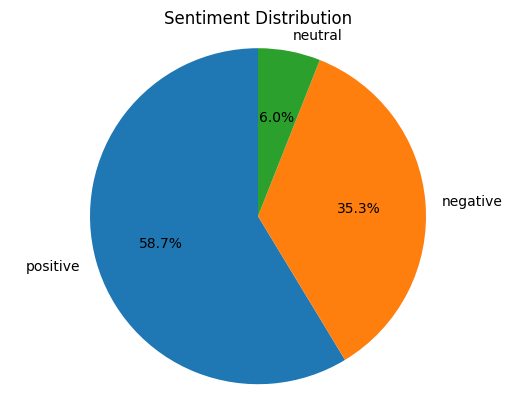

In [ ]:
import matplotlib.pyplot as plt

# Compute value counts for sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# Get the labels and counts for the pie chart
labels = sentiment_counts.index
counts = sentiment_counts.values

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Set chart title
plt.title('Sentiment Distribution')

# Display the chart
plt.show()


#### The pie chart represents the sentiment distribution in the data by showing the proportions or percentages of each sentiment category.

### Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df[['review_processed_4','review_processed']], 
                                                        df['Sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
Sentiment
positive    70
negative    42
neutral      8
Name: count, dtype: int64
Value counts for Test sentiments
Sentiment
positive    18
negative    11
neutral      1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                 review_processed_4   
0      0   [just, received, online, order, it, 's, perfect]  \
1    143  [love, shopping, online, i, do, from, comfort,...   
2     72  [had, great, experience, this, online, store, ...   
3    116  [ca, n't, believe, affordable, online, store, ...   
4     20  [just, got, scammed, an, online, store, never,...   

                                    review_processed  
0   i just received my online order and it's perf...  
1   i love shopping online because i can do it fr...  
2   i had a great experience with this online sto...  
3   i can't believe how affordable this online st...  
4   i just got scammed by an online store! 

In [ ]:
print(X_test.head())

   index                                 review_processed_4   
0      6   [just, received, online, order, it, 's, damaged]  \
1     61  [ca, n't, believe, fast, online, order, arrive...   
2     90  ['m, love, the, shoe, ordered, this, online, s...   
3     30  [just, a, terrible, experience, an, online, st...   
4     31  ['m, excited, my, upcoming, online, shopping, ...   

                                    review_processed  
0   i just received my online order and it's dama...  
1   i can't believe how fast my online order arri...  
2   i'm so in love with the shoes i ordered from ...  
3   i just had a terrible experience with an onli...  
4   i'm so excited for my upcoming online shoppin...  


In [ ]:
print(Y_train.head())

   index Sentiment
0      0  positive
1    143  positive
2     72  positive
3    116  positive
4     20   neutral


###  Generating Word2Vec Model
#### Word2Vec is an NLP model that learns word embeddings by training on text data. It captures semantic relationships between words and provides dense vector representations that can be used in various NLP tasks.
#### Word2Vec analyze the semantic relationships between words, allow us to understand the emotional connotations associated with specific words, provide insights into how emotions are expressed and related, and enhance sentiment analysis or emotion detection models by providing meaningful representations of words, enabling more accurate understanding and classification of emotions expressed in social media posts.

In [ ]:
from gensim.models import Word2Vec

# Skip-gram model. Below parameters have been selected after doing cross validation 
size_dim = 10 # Default number of dimensions of the embeddings. So no need to add separately
window = 3 #Maximum distance between a target word and words around the target word
min_count = 3 #Minimum count of words considered while training the model, words with lesser occurrence will be ignored
sg = 1 #for skip gram model = 1 and for  CBOW =0
review_online_processed = pd.Series(df['review_processed_4']).values

# Train the Word2Vec Model
w2v_model = Word2Vec(review_online_processed,vector_size=30, min_count = min_count, workers = 4, window = window, sg = sg)

In [ ]:
w2v_model.wv['shopping']

array([-0.02649723, -0.02286353,  0.01873156, -0.01687171,  0.00289035,
       -0.02887497,  0.00206055, -0.00082014, -0.03574265,  0.00694503,
       -0.00245994, -0.00029431,  0.04385583,  0.00639695, -0.02903237,
       -0.03388055,  0.02699405, -0.01877779, -0.0158638 ,  0.02926249,
        0.02006722, -0.04919611, -0.02099394, -0.00030813,  0.01780738,
        0.0477097 ,  0.05032372,  0.03897376,  0.01210417, -0.03570239],
      dtype=float32)

In [ ]:
# Store the vectors for train data in following file
OUTPUT_FOLDER=""


word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(30))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(30)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

### Model Training

In [ ]:
## Read the data
# Load file in which features are stored
word2vec_df = pd.read_csv(r"train_review_word2vec.csv")
word2vec_df=word2vec_df.fillna(0)


In [ ]:
word2vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.015507,-0.024793,0.078790,0.018730,0.017385,-0.010409,0.026954,0.028511,-0.046778,0.008593,...,0.009927,-0.028705,-0.025103,0.039153,0.027663,0.025217,0.039690,0.038264,-0.007221,-0.038539
1,-0.015215,-0.008612,0.045206,0.013704,0.007181,-0.000692,0.035331,0.018234,-0.029485,0.006200,...,0.001543,-0.018615,-0.004820,0.027111,0.017706,0.021455,0.029914,0.029184,-0.003369,-0.030762
2,-0.004113,-0.015279,0.056778,0.009374,0.002994,0.007507,0.033223,0.025642,-0.031242,0.016352,...,0.001929,-0.026582,-0.007517,0.036926,0.024111,0.011690,0.032060,0.026620,-0.004819,-0.029526
3,-0.017239,-0.024534,0.066654,0.010332,0.019212,-0.003842,0.027008,0.028889,-0.040933,0.010838,...,0.004097,-0.030207,-0.013136,0.034652,0.020173,0.026594,0.045231,0.029633,-0.006168,-0.023966
4,-0.014751,-0.023097,0.046211,0.009705,0.012961,-0.003304,0.017939,0.006761,-0.032322,0.003506,...,0.006325,-0.014607,-0.008319,0.023666,0.015561,0.014706,0.031462,0.030830,-0.006865,-0.027660


### Random Forest Model

#### The data is fed into a Random forest classifier to predict the Sentiments and also compute time needed

In [ ]:
import time

#Import the DecisionTreeeClassifier
from sklearn.ensemble import RandomForestClassifier

#Initialize the model
clf_decision_word2vec = RandomForestClassifier(
n_estimators= 30,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 12,
 criterion= 'entropy',
 bootstrap= True,
class_weight='balanced') 

start_time = time.time()

# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['Sentiment'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 0.21114706993103027


The output tells the time it took (0.211 seconds) to fit the RandomForestClassifier model using word2vec vectors as input, which can be used to assess the speed and efficiency of the model training process.

### Performance on Train Set

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

train_features = []

for index, row in X_train.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        train_features.append(vector)
    else:
        train_features.append(np.array([0 for i in range(30)]))
        
train_predictions = clf_decision_word2vec.predict(train_features)

print(classification_report(Y_train['Sentiment'],train_predictions))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        42
     neutral       0.89      1.00      0.94         8
    positive       1.00      0.99      0.99        70

    accuracy                           0.99       120
   macro avg       0.96      1.00      0.98       120
weighted avg       0.99      0.99      0.99       120



Precision:

"Negative" class: Precision of 1.00 (100%) means all predicted negatives were correct.

"Neutral" class: Precision of 0.89 (89%) indicates that 89% of predicted neutrals were correct.

"Positive" class: Precision of 1.00 (100%) means all predicted positives were correct.

Recall:

"Negative" class: Recall of 1.00 (100%) means all actual negatives were correctly predicted.

"Neutral" class: Recall of 1.00 (100%) means all actual neutrals were correctly predicted.

"Positive" class: Recall of 0.99 (99%) indicates that 99% of actual positives were correctly predicted.

F1-score:

"Negative" class: F1-score of 1.00 (100%) represents a perfect balance between precision and recall for negatives.

"Neutral" class: F1-score of 0.94 (94%) indicates a good balance between precision and recall for neutrals.

"Positive" class: F1-score of 0.99 (99%) represents a strong balance between precision and recall for positives.


Accuracy: Overall accuracy is 0.99 (99%), indicating that 99% of instances were correctly classified across all classes.

The classification report shows the model's performance for each sentiment class. Precision, recall, and F1-score indicate the accuracy, completeness and balanced performance respectively. Support shows the dataset size, and accuracy represents the overall correct classification rate. 



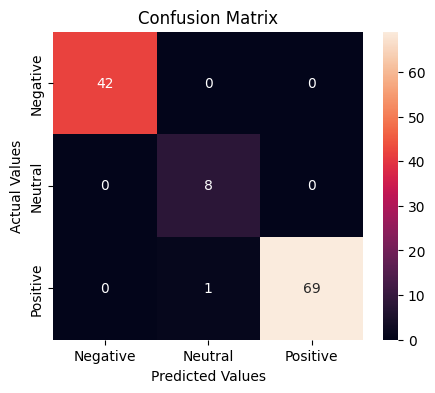

          Negative  Neutral  Positive
Negative        42        0         0
Neutral          0        8         0
Positive         0        1        69


In [ ]:
cm = confusion_matrix(Y_train['Sentiment'],train_predictions)
cm_df = pd.DataFrame(cm,
index = ['Negative','Neutral','Positive'],
columns = ['Negative','Neutral','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(cm_df)

The confusion matrix output represents the counts of instances correctly classified for each sentiment class combination and evaluate the performance of the classification model in predicting the sentiment. The model's performance of the confusion matrix is good, with no misclassifications observed for the given training data.

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# Perform cross-validation

scores = cross_val_score(clf_decision_word2vec, word2vec_df, Y_train['Sentiment'], cv=5)

# Calculate the mean accuracy

accuracy_RFC = scores.mean()

print("Accuracy for RFC Model:", accuracy_RFC)

Accuracy for RFC Model: 0.6583333333333334


The accuracy score for the Random Forest Classifier Model indicates that the model is able to predict the sentiment of the text data with an accuracy of around 65.83% and the model is performing moderately well.

In [ ]:
from sklearn.metrics import classification_report

test_features = []

for index, row in X_test.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        test_features.append(vector)
    else:
        test_features.append(np.array([0 for i in range(100)]))
        
test_predictions = clf_decision_word2vec.predict(test_features)

print(classification_report(Y_test['Sentiment'],test_predictions))

              precision    recall  f1-score   support

    negative       0.75      0.55      0.63        11
     neutral       0.00      0.00      0.00         1
    positive       0.73      0.89      0.80        18

    accuracy                           0.73        30
   macro avg       0.49      0.48      0.48        30
weighted avg       0.71      0.73      0.71        30



### Logistics Regression Model

In [ ]:
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression model
logreg = LogisticRegression()
start_time = time.time()


# Training the model on the training data
logreg.fit(word2vec_df, Y_train['Sentiment'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 0.09940576553344727


The output shows the time it took (0.0994 seconds) to fit the Logistic Regression model using word2vec vectors as input, which can be used to assess the efficiency and scalability of the model training process.

In [ ]:
train_predictions_LR = logreg.predict(train_features)
print(classification_report(Y_train['Sentiment'],train_predictions_LR))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        42
     neutral       0.00      0.00      0.00         8
    positive       0.58      1.00      0.74        70

    accuracy                           0.58       120
   macro avg       0.19      0.33      0.25       120
weighted avg       0.34      0.58      0.43       120



Negative Sentiment:

The model incorrectly predicted all instances as either neutral or positive, resulting in a precision, recall, and F1-score of 0.00 for the negative sentiment class. 

Neutral Sentiment:

 The model also incorrectly classified all instances as either negative or positive, resulting in a precision, recall, and F1-score of 0.00 for the neutral sentiment class. 

Positive Sentiment: 

The model correctly predicted 58% of instances as positive, resulting in a precision of 0.58, recall of 1.00, and an F1-score of 0.74 for the positive sentiment class. 

Accuracy: The overall accuracy of the model is 58%, indicating that approximately 58% of the dataset were classified correctly.

The classification report shows that model performed poorly for the negative and neutral sentiment classes, while it demonstrates relatively better performance for the positive sentiment class. The overall accuracy is 58%, indicating that the model correctly classified 58% of the instances

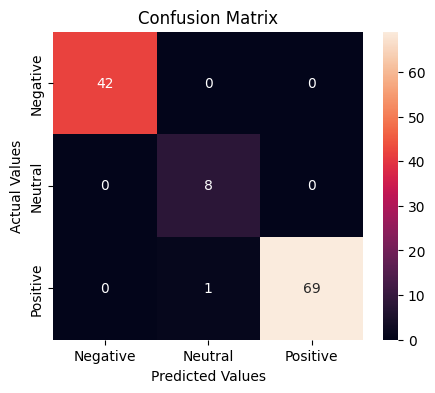

          Negative  Neutral  Positive
Negative        42        0         0
Neutral          0        8         0
Positive         0        1        69


In [ ]:
cm = confusion_matrix(Y_train['Sentiment'],train_predictions)
cm_df = pd.DataFrame(cm,
index = ['Negative','Neutral','Positive'],
columns = ['Negative','Neutral','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(cm_df)

42 instances were correctly classified as "Negative" (True Negatives).

8 instances were correctly classified as "Neutral" (True Neutrals).

69 instances were correctly classified as "Positive" (True Positives).

1 instance of a positive observation was incorrectly classified as "Negative" (False Negative).

There were no instances of negative or neutral observations incorrectly classified as "Positive" (False Positive).

There were no instances of negative or positive observations incorrectly classified as "Neutral" (False Neutral).

The majority of instances across all sentiment categories (negative, neutral, and positive) are correctly classified.




In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# Perform cross-validation

scores = cross_val_score(clf_decision_word2vec, word2vec_df, Y_train['Sentiment'], cv=5)

# Calculate the mean accuracy

accuracy_LR = scores.mean()

print("Accuracy for LR Model:", accuracy_LR)

Accuracy for LR Model: 0.6166666666666667


The accuracy score of 0.6166 indicates that the Logistics Regression model correctly predicts the sentiment of the data in approximately 61.66% of the cases. Accuracy is a common evaluation metric for classification models, and a higher accuracy score generally indicates better performance.

In [ ]:
from sklearn.metrics import classification_report

test_features = []

for index, row in X_test.iterrows():
    
    vector = np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)
    
    if type(vector) is np.ndarray:
        test_features.append(vector)
    else:
        test_features.append(np.array([0 for i in range(100)]))
        
test_predictions_LR = logreg.predict(test_features)
print(classification_report(Y_test['Sentiment'],test_predictions_LR))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        11
     neutral       0.00      0.00      0.00         1
    positive       0.60      1.00      0.75        18

    accuracy                           0.60        30
   macro avg       0.20      0.33      0.25        30
weighted avg       0.36      0.60      0.45        30



### Emotion Detection

In [ ]:
df['Emotions'].unique()

array(['satisfied', 'frustrated', 'excited', 'disappointed',
       'convenience', 'annoyed', 'impressed', 'grateful', 'expensive',
       'relieved', 'happy', 'addicted', 'helpful', 'obsessed',
       'surprised', 'mislead', 'sad', 'joy', 'delighted', 'anger',
       'amazed', 'appreciated', 'love'], dtype=object)

This shows the emotions of each posts in the dataset

In [ ]:
df['Emotions'].value_counts()

Emotions
disappointed    25
excited         23
satisfied       19
frustrated      16
happy           14
annoyed          8
delighted        7
impressed        7
appreciated      5
convenience      4
surprised        4
anger            3
grateful         2
joy              2
relieved         2
expensive        2
amazed           1
addicted         1
sad              1
mislead          1
obsessed         1
helpful          1
love             1
Name: count, dtype: int64

### Merging similar emotions together 

In [ ]:
# We are going to merge some  categories to make a data augmentation
df['Emotions'].replace(to_replace=['appreciated', 'grateful', 'love'], value='delighted', inplace=True)

# Let's replace 'sad' and 'mislead' for 'disappointed'
df['Emotions'].replace(to_replace=['sad','mislead'],value='disappointed', inplace=True)

# Let's replace 'convenience' and 'helpful' for 'satisfied'
df['Emotions'].replace(to_replace=['convenience','helpful'],value='satisfied', inplace=True)

# Let's replace 'surprised' and 'amazed' for 'impressed'
df['Emotions'].replace(to_replace=['surprised','amazed'],value='impressed',inplace=True)

# Let's replace 'anger' for 'annoyed'
df['Emotions'].replace(to_replace='anger', value='annoyed', inplace=True)

# Let's replace 'joy','relieved','addicted' and 'obsessed' for 'happy'
df['Emotions'].replace(to_replace=['joy','relieved','addicted','obsessed'],value='happy', inplace=True)

# Let's replace 'expensive' for 'frustrated'
df['Emotions'].replace(to_replace='expensive', value='frustrated', inplace=True)

df.groupby('Emotions')['Emotions'].count().sort_values(ascending=False)

Emotions
disappointed    27
satisfied       24
excited         23
happy           20
frustrated      18
delighted       15
impressed       12
annoyed         11
Name: Emotions, dtype: int64

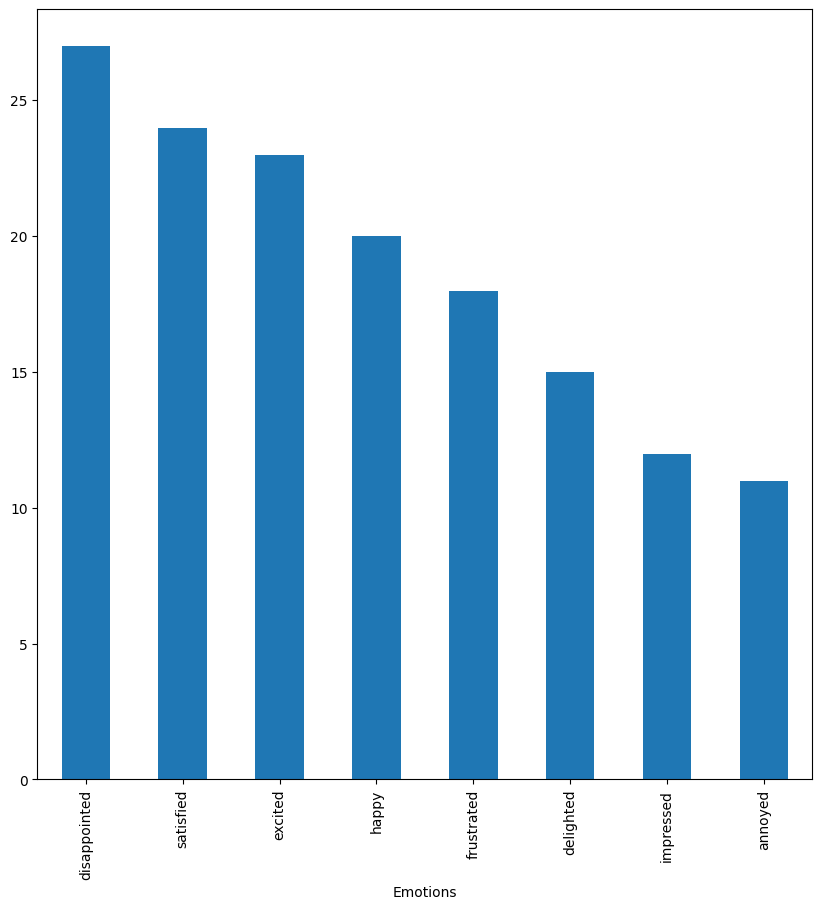

In [ ]:
plt.figure(figsize=(10,10))
df['Emotions'].value_counts().plot(kind = 'bar')
plt.show()

The bar chart represents the distribution of merged emotions.

In [ ]:
#Encoding output labels
from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.Emotions.values)


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.Posts.values, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [ ]:
print(lbl_enc.classes_)

['annoyed' 'delighted' 'disappointed' 'excited' 'frustrated' 'happy'
 'impressed' 'satisfied']


The ouput shows the unique classes in the encoded labels representing the distinct emotions present in the dataset

The index of each label is the value given by the encoder: 

annoyed-0 , delighted-1 , disappointed-2, excited-3, frustrated-4, happy-5,
 impressed-6, satisfied-7

In [ ]:
# Extracting TF-IDF parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 400, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

In [ ]:
## Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df['Posts'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

In [ ]:
# Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
print('random forest tfidf accuracy %s' % accuracy_score(y_pred, y_val))

random forest tfidf accuracy 0.06666666666666667


The random forest tfidf accuracy (0.06666666666666667) represents the accuracy score of the Random Forest classifier model when using TF-IDF (Term Frequency-Inverse Document Frequency) encoded features for prediction on the validation set.

The accuracy score of 0.0667 indicates that the model's predictions align with the true labels in the validation set approximately 6.67% of the time. The model's performance is quite low, as it is only able to correctly predict the emotions in the validation set at a very low rate.

In [ ]:
# Model 2: logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, max_iter=21000)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))

log reg tfidf accuracy 0.2


The log reg tfidf accuracy (0.2) represents the accuracy score of the Logistic Regression model when using TF-IDF (Term Frequency-Inverse Document Frequency) encoded features for prediction on the validation set. The accuracy score of 0.2 indicates that the model's predictions align with the true labels in the validation set and the model's performance is relatively low, as it is only able to correctly predict the emotions in the validation set around 20% of the time.

In [ ]:
# Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
print('random forest with count vectors accuracy %s' % accuracy_score(y_pred, y_val))

random forest with count vectors accuracy 0.6666666666666666


The random forest with count vectors accuracy (0.6666666666666666) represents the accuracy score of the Random Forest classifier model when using count vectors as features for prediction on the validation set.

The accuracy score of 0.6667 indicates that the model's predictions align with the true labels in the validation set approximately 66.67% of the time and the model's performance is relatively good, as it is able to correctly predict the emotions in the validation set.

In [ ]:
# Model 2: Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, max_iter=21000)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))


log reg count vectors accuracy 0.5333333333333333


The log reg count vectors accuracy (0.533333333333333) represents the accuracy score of the Logistic Regression model when using count vectors as features for prediction on the validation set.

The accuracy score of 0.5333 indicates that the model's predictions align with the true labels in the validation set approximately 53.33% of the time and the model's performance is moderate, as it is able to correctly predict the emotions in the validation set.

##### The random forest seems to be the algorithm with highest accuracy with a 66% using count vectors. Let's use it for our  data and see how many reviews fit to every emotion.

In [ ]:
import re

reviews= df['Posts']

# Doing some preprocessing on these reviews as done before
reviews = reviews.apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews = reviews.str.replace('[^\w\s]',' ')
reviews = reviews.str.replace('(www|http)\S+', ' ')

from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews = reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

import re

def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

reviews = reviews.apply(lambda x: " ".join(de_repeat(x) for x in x.split()))

# Extracting Count Vectors feature from our Reviews
review_count = count_vect.transform(reviews)

#Predicting the emotion of the reviews using our already trained random forest 
review_pred = rf.predict(review_count)


In [ ]:
df['emotion_1'] = review_pred.tolist()
df['emotion_1'].replace(to_replace=0, value='annoyed', inplace=True)
df['emotion_1'].replace(to_replace=1, value='delighted', inplace=True)
df['emotion_1'].replace(to_replace=2, value='disappointed', inplace=True)
df['emotion_1'].replace(to_replace=3, value='excited', inplace=True)
df['emotion_1'].replace(to_replace=4, value='frustrated', inplace=True)
df['emotion_1'].replace(to_replace=5, value='happy', inplace=True)
df['emotion_1'].replace(to_replace=6, value='impressed', inplace=True)
df['emotion_1'].replace(to_replace=7, value='satisfied', inplace=True)
df.groupby('emotion_1')['emotion_1'].count().sort_values(ascending=False)

emotion_1
satisfied       32
disappointed    25
excited         24
happy           23
frustrated      17
delighted       12
impressed        9
annoyed          8
Name: emotion_1, dtype: int64

This output displays the predicted unique emotions.

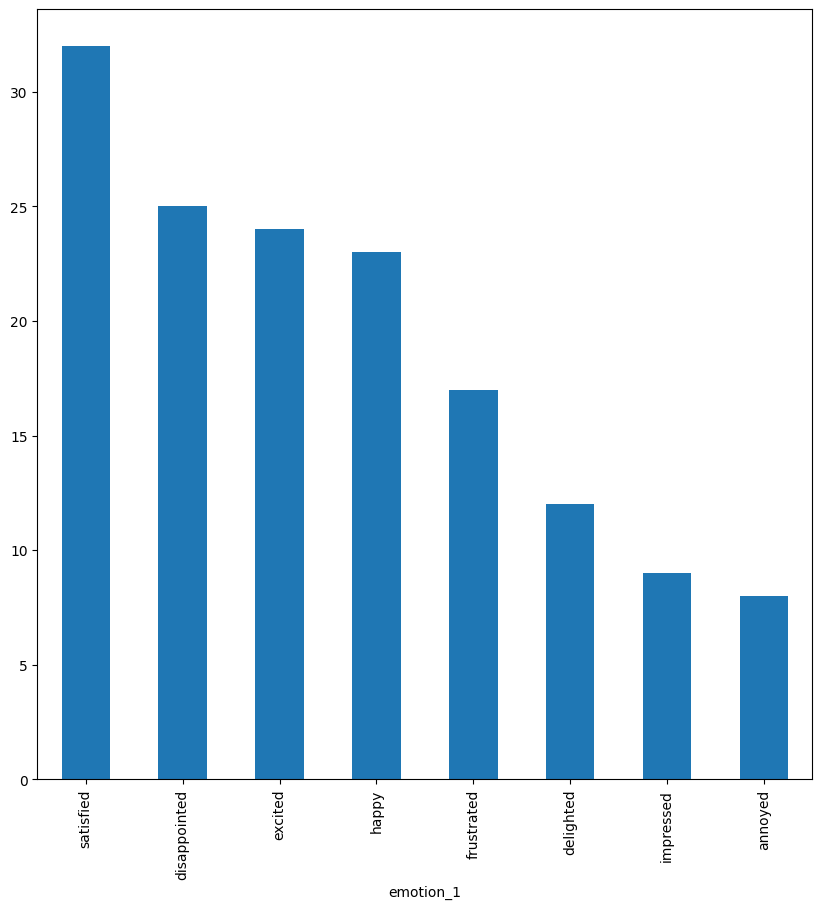

In [ ]:
plt.figure(figsize=(10,10))
df['emotion_1'].value_counts().plot(kind = 'bar')
plt.show()

This chart displays the predicted unique emotions.

In [ ]:
## Let's group reviews by emotion
satisfied_reviews = df.loc[df['emotion_1'] == 'satisfied']
disappointed_reviews = df.loc[df['emotion_1'] == 'disappointed']
frustrated_reviews = df.loc[df['emotion_1'] == 'frustrated']
excited_reviews = df.loc[df['emotion_1'] == 'excited']
happy_reviews = df.loc[df['emotion_1'] == 'happy']
delighted_reviews = df.loc[df['emotion_1'] == 'delighted']
annoyed_reviews = df.loc[df['emotion_1'] == 'annoyed']
impressed_reviews = df.loc[df['emotion_1'] == 'impressed']


In [ ]:
print(annoyed_reviews)

                                                 Posts Emotions   
5     I'm so annoyed that my online order was cance...  annoyed  \
12    I'm so annoyed with the customer service I re...  annoyed   
24    I'm so annoyed with the constant emails and a...  annoyed   
43    I'm so annoyed that the online store charges ...  annoyed   
67    I just had a terrible experience with an onli...  annoyed   
74    I'm so annoyed with this online store's custo...  annoyed   
105   I ordered from this online store and they cha...  annoyed   
134   I'm so annoyed with this online store's email...  annoyed   

                                      review_processed   
5     i'm so annoyed that my online order was cance...  \
12    i'm so annoyed with the customer service i re...   
24    i'm so annoyed with the constant emails and a...   
43    i'm so annoyed that the online store charges ...   
67    i just had a terrible experience with an onli...   
74    i'm so annoyed with this online store's cu

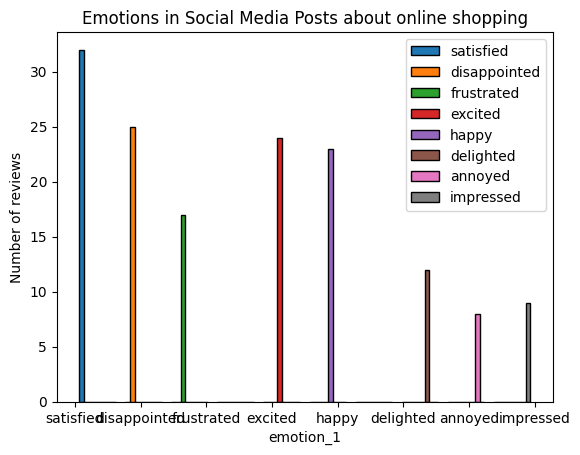

In [ ]:
import matplotlib.pyplot as plt

# Plotting the emotions as a histogram
plt.hist([satisfied_reviews['emotion_1'],
          disappointed_reviews['emotion_1'],
          frustrated_reviews['emotion_1'],
          excited_reviews['emotion_1'],
          happy_reviews['emotion_1'],
          delighted_reviews['emotion_1'],
          annoyed_reviews['emotion_1'],
          impressed_reviews['emotion_1']],
         bins=10, edgecolor='black', label=['satisfied', 'disappointed', 'frustrated', 'excited', 'happy', 'delighted', 'annoyed', 'impressed'])

# Setting the title and labels
plt.title('Emotions in Social Media Posts about online shopping')
plt.xlabel('emotion_1')
plt.ylabel('Number of reviews')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()


The histogram shows visual analysis of the emotions distribution, enabling to identify which emotions are more commonly expressed in these posts. It provides insights into the overall sentiment or emotional tone of the online shopping-related discussions on social media platforms.

### CONCLUSION

The research project provides valuable insights into the emotional responses of people towards Online shopping on social media. Sentiments anaysis were categorized on the sentiment associated with each data point in the compound  as either positive, neutral, or negative showing the emotional aspect of the data. 

Word2Vec Model was used to analyze the semantic relationships between words, allow us to understand the emotional connotations associated with specific words, provide insights into how emotions are expressed and related, and enhance sentiment analysis or emotion detection models by providing meaningful representations of words, enabling more accurate understanding and classification of emotions expressed in social media posts. Random Forest Classifer and Logistics Regression Models were used to find the accuracy and performance of the model. Both had accuracy of 65.83% and 61.67% respepectively. Accuracy is a common evaluation metric for classification models, and a higher accuracy score generally indicates better performance.

Emotions of Posts were grouped similarly to get a unique emotion for each Post. TF-IDF and Count Vectors parameters were used on the Random forest Classifer and Logistics Regression Models to find the accuracy of each. The random forest had the highest accuracy with a 66% using count vectors and was used to show how many reviews fit to every emotion. Reviews were grouped by emotions indicating each review with its emotion.

To Conclude, this information can be used by businesses, policymakers, or social media marketers to better understand public emotions and tailor their messaging or strategies accordingly. It can also provide a foundation for future research exploring the relationship between emotions, social media, and public opinion.

### References

https://www.kaggle.com/code/manuelbenedicto/emotions-towards-covid-19-on-reddit/notebook

https://www.kaggle.com/code/simonityagi/a-guide-to-sentiment-analysis-using-word2vec/notebook

https://www.kaggle.com/code/suraj520/bert-based-sentiment-detection/notebook

https://chat.openai.com/